# Setup

First let's install and setup the necessary libraries.

First clone the github repository with the following command:

In [1]:
import os

!git clone https://github.com/ioannispartalas/CrossLingual-NLP-AMLD2020.git
#With this command, the path to the data is 
workdir = './CrossLingual-NLP-AMLD2020/'
os.environ["WORKDIR"] = workdir

#Please check if this correct, otherwise correct path_to_data
!printenv WORKDIR
!ls $WORKDIR/data/laser
!mkdir $WORKDIR/data/raw

Cloning into 'CrossLingual-NLP-AMLD2020'...
remote: Enumerating objects: 134, done.
remote: Counting objects: 100% (134/134), done.
remote: Compressing objects: 100% (121/121), done.
remote: Total 465 (delta 83), reused 29 (delta 13), pack-reused 331
Receiving objects: 100% (465/465), 63.94 MiB | 30.11 MiB/s, done.
Resolving deltas: 100% (260/260), done.
./CrossLingual-NLP-AMLD2020/
ar_laser_test.npy	  es_laser_test.npy	    ru_laser_test.npy
ar_laser_train.npy	  es_laser_train.npy	    ru_laser_train.npy
ar_test_labels_adan.txt   es_test_labels_adan.txt   ru_test_labels_adan.txt
ar_train_labels_adan.txt  es_train_labels_adan.txt  ru_train_labels_adan.txt
en_laser_test.npy	  nl_laser_test.npy	    tr_laser_test.npy
en_laser_train.npy	  nl_laser_train.npy	    tr_laser_train.npy
en_test_labels_adan.txt   nl_test_labels_adan.txt   tr_test_labels_adan.txt
en_train_labels_adan.txt  nl_train_labels_adan.txt  tr_train_labels_adan.txt


Download data from on your local file system and upload it to colab fs with the cell below

In [0]:
# from google.colab import files
# uploaded = files.upload()
# !tar -jxf *.bz2 -C  $WORKDIR/data/raw/
# !rm ./semeveal15_sentiment_datasets.tar.bz2

In [0]:
# TY_COMMENT
# above cell does not work with safari.
# either switch to chrome 
# or upload the gz2 file using "upload" button on the side bar 
# then do the following:

!tar -jxf *.bz2 -C  $WORKDIR/data/raw/
!rm ./semeveal15_sentiment_datasets.tar.bz2

In [4]:
# Make sure you have all the semeval files 
!ls $WORKDIR/data/raw

semeval15.en.test.csv	semeval15.es.train.csv	semeval15.ru.test.csv
semeval15.en.train.csv	semeval15.nl.test.csv	semeval15.ru.train.csv
semeval15.es.test.csv	semeval15.nl.train.csv


Install LASER and conceptNet.  **This might take a 
while**




In [5]:
%cd CrossLingual-NLP-AMLD2020/
!bash install_laser.sh
!bash download_conceptNet.sh

/content/CrossLingual-NLP-AMLD2020
Checking out github repo
/root/projects
Cloning into 'LASER'...
remote: Enumerating objects: 8, done.
remote: Counting objects: 100% (8/8), done.
remote: Compressing objects: 100% (8/8), done.
remote: Total 756 (delta 2), reused 2 (delta 0), pack-reused 748
Receiving objects: 100% (756/756), 2.77 MiB | 18.05 MiB/s, done.
Resolving deltas: 100% (281/281), done.
     |████████████████████████████████| 51kB 1.7MB/s 
 - creating directory /root/projects/LASER/models
 - bilstm.eparl21.2018-11-19.pt
 - eparl21.fcodes
 - eparl21.fvocab
 - bilstm.93langs.2018-12-26.pt
 - 93langs.fcodes
 - 93langs.fvocab
Installing external tools
 - creating directory /root/projects/LASER/tools-external/moses-tokenizer/tokenizer
 - download tokenizer/tokenizer.perl
 - download tokenizer/detokenizer.perl
 - download tokenizer/normalize-punctuation.perl
 - download tokenizer/remove-non-printing-char.perl
 - download tokenizer/deescape-special-chars.perl
 - download tokenizer/low

Restart the runtime  environnement.

In [0]:
os.kill(os.getpid(), 9)

Set  environnement variables and load modules

In [0]:
import sys
import os
import importlib

os.environ.setdefault("LASER","/root/projects/LASER/")
assert os.environ.get('LASER'), 'Please set the environement variable LASER'
LASER = os.environ['LASER']
sys.path.append(LASER + 'source/lib')
sys.path.append(LASER+"source/")

workdir = './CrossLingual-NLP-AMLD2020/'
os.environ["WORKDIR"] = workdir
sys.path.insert(1, workdir)

from src.models import *

In [2]:
!printenv WORKDIR
!printenv LASER

./CrossLingual-NLP-AMLD2020/
/root/projects/LASER/


If everything went well the following should not print any errors.

In [3]:
import sys
sys.path.append("..")
from src.models import *

print(Doc2Laser.__doc__)

Transform raw documents to their LASER representations.
    
    Parameters:
    -------------
    lang: string, the language to encode
    cpu: boolean, whether to use cpu of gpu
    


Yay!

# Introduction to Language Representation and Text Classification

## Language is hard! 

Take a look at the following sentences: 
1. Jane went to the store
2. went the to Jane store 
3. Jane went store 
4. Jane goed store 

They (try to) express similar meanings, but some feel un-natural!  

Several things to handle: 
- Morphology
- Syntax <- touch on this 
- Semantics/World Knowledge <- touch on this but mostly shallow semantics
- Discourse 
- Pragmatics 
- Multilinguality <- focus on this



## Sentiment Classification
- A type of Text Classification task.
- binary (positive, negative)
- ternary (positive, neutral, negative)
- ordinal (image below!)

<img src="https://github.com/ioannispartalas/CrossLingual-NLP-AMLD2020/blob/master/data/images/sentiment-5class.png?raw=1" width="600">

*Input* (x): a text span 

*Output* (y): a class/category (sentiment polarity in the sentiment classification example)

**Goal**: Train a function $f(x) \rightarrow y$

- How to represent text? 
- What functions can we use for the task? 
- How to evaluate performance?



## Machine Learning workflow
1. Get data
1. Inspect the data
1. Preprocess/Clean/Normalize the data
1. Vector Representation
1. Modeling 
1. Evaluation

<img src="https://github.com/ioannispartalas/CrossLingual-NLP-AMLD2020/blob/master/data/images/pipeline.png?raw=1" width="600">




## Text representation: Bag-of-Words and TF/IDF weiging

Given a text, extract the vocabulary, build a vector of dim $|V|$, non-zeros are words that appear. 
<img src="https://github.com/ioannispartalas/CrossLingual-NLP-AMLD2020/blob/master/data/images/textVectorization.png?raw=1" width="600">

In [11]:
from sklearn.feature_extraction.text import CountVectorizer
corpus = ['This is the first document.',
'This document is the second document.',
'And this is the third one.',
'Is this the first document?']

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(corpus)
print(vectorizer.get_feature_names())
print(X.toarray())

['and', 'document', 'first', 'is', 'one', 'second', 'the', 'third', 'this']
[[0 1 1 1 0 0 1 0 1]
 [0 2 0 1 0 1 1 0 1]
 [1 0 0 1 1 0 1 1 1]
 [0 1 1 1 0 0 1 0 1]]



- Words are identified by their ids
- Non-zero means a word occurs
- The value, is the number of times the word occurs in a sentence

In [12]:
vectorizer.transform(['This is the first document', 'is document the first this']).toarray()

array([[0, 1, 1, 1, 0, 0, 1, 0, 1],
       [0, 1, 1, 1, 0, 0, 1, 0, 1]])

- order does not matter! Recall the example with Jane ;-)
- words like 'and, the' matter the same with words like 'super, great, ..'. This is a limitation. 
- tf-idf (term frequence, inverse document frequency) is an heuristic that can get us far!

$tf_{i,j}\times\log\frac{N}{df_i}$

where

$tf_{i,j}$ is number of times the term $i$ appears in document $j$, $df_i$ is the document frequency in the full collection of documents and $N$ is the number of available documents.

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer
corpus = ['This is the first document.',
'This document is the second document.',
'And this is the third one.',
'Is this the first document?']

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(corpus)
print(vectorizer.get_feature_names())
print(X.toarray())

['and', 'document', 'first', 'is', 'one', 'second', 'the', 'third', 'this']
[[0.         0.46979139 0.58028582 0.38408524 0.         0.
  0.38408524 0.         0.38408524]
 [0.         0.6876236  0.         0.28108867 0.         0.53864762
  0.28108867 0.         0.28108867]
 [0.51184851 0.         0.         0.26710379 0.51184851 0.
  0.26710379 0.51184851 0.26710379]
 [0.         0.46979139 0.58028582 0.38408524 0.         0.
  0.38408524 0.         0.38408524]]


## Beyond single words: N-grams and Character-grams

Other tricks and tips: 
- Recall text is a sequence of symbols. We may care for characters instead of words (think typos) 
- We may care for longer sequences that single words: New York, not great, .. 

In [14]:
# Character grams

vectorizer = CountVectorizer(analyzer='char', ngram_range=(1,1)) # This creates character-grams of size 1
X = vectorizer.fit_transform(corpus)
print(vectorizer.get_feature_names())
print(X.toarray())

[' ', '.', '?', 'a', 'c', 'd', 'e', 'f', 'h', 'i', 'm', 'n', 'o', 'r', 's', 't', 'u']
[[4 1 0 0 1 1 2 1 2 3 1 1 1 1 3 4 1]
 [5 1 0 0 3 3 4 0 2 2 2 3 3 0 3 4 2]
 [5 1 0 1 0 2 2 0 3 3 0 2 1 1 2 3 0]
 [4 0 1 0 1 1 2 1 2 3 1 1 1 1 3 4 1]]


N-grams are sequences of *objects*. Here, objects, are either charactets sequences or word sequences. For character sequences for example:

<img src="https://github.com/ioannispartalas/CrossLingual-NLP-AMLD2020/blob/master/data/images/ngrams.png?raw=1">

In this figure notice the sliding window of size 3. While moving from left to right, it generates the possible sequences that will be used to populate the vector representations. Due to the fact that the window is of size 3, the method will generate character 3-grams. If, instead of character in the figure, we were using words, we would be generating word 3-grams. 

**Question**: can you think of a limitation of word 3-grams, 4-grams, 5-grams etc.?

**Exercise**: how to get these sequences in Python (in an elegant way)?

In [16]:
# N-grams (can be either char-grams or word-grams)
vectorizer = CountVectorizer(analyzer='char', ngram_range=(2,3)) # This creates character-grams of sizes 2 and 3
X = vectorizer.fit_transform(corpus)
print(vectorizer.get_feature_names())
print(X.toarray())

[' d', ' do', ' f', ' fi', ' i', ' is', ' o', ' on', ' s', ' se', ' t', ' th', 'an', 'and', 'co', 'con', 'cu', 'cum', 'd ', 'd d', 'd o', 'd t', 'do', 'doc', 'e ', 'e f', 'e s', 'e t', 'e.', 'ec', 'eco', 'en', 'ent', 'fi', 'fir', 'he', 'he ', 'hi', 'hir', 'his', 'ir', 'ird', 'irs', 'is', 'is ', 'me', 'men', 'nd', 'nd ', 'ne', 'ne.', 'nt', 'nt ', 'nt.', 'nt?', 'oc', 'ocu', 'on', 'ond', 'one', 'rd', 'rd ', 'rs', 'rst', 's ', 's d', 's i', 's t', 'se', 'sec', 'st', 'st ', 't ', 't d', 't i', 't.', 't?', 'th', 'the', 'thi', 'um', 'ume']
[[1 1 1 1 1 1 0 0 0 0 1 1 0 0 0 0 1 1 0 0 0 0 1 1 1 1 0 0 0 0 0 1 1 1 1 1
  1 1 0 1 1 0 1 2 2 1 1 0 0 0 0 1 0 1 0 1 1 0 0 0 0 0 1 1 2 0 1 1 0 0 1 1
  1 1 0 1 0 2 1 1 1 1]
 [2 2 0 0 1 1 0 0 1 1 1 1 0 0 1 1 2 2 1 1 0 0 2 2 1 0 1 0 0 1 1 2 2 0 0 1
  1 1 0 1 0 0 0 2 2 2 2 1 1 0 0 2 1 1 0 2 2 1 1 0 0 0 0 0 2 1 0 1 1 1 0 0
  1 0 1 1 0 2 1 1 2 2]
 [0 0 0 0 1 1 1 1 0 0 3 3 1 1 0 0 0 0 2 0 1 1 0 0 1 0 0 1 1 0 0 0 0 0 0 1
  1 2 1 1 1 1 0 2 2 0 0 1 1 1 1 0 0 0 0 0 0 1

# Dense Representations

All of the above techniques have a common limitation. The do not encode semantics! 
This means that the vector for `amazing` is completely disimilar from the vector of `great` and the of vector `Laussane`. 
Can we do better?
The answer is yes! Enter, word embeddings. 
Dense word representation, that can encode the meaning! 

<img src="https://github.com/ioannispartalas/CrossLingual-NLP-AMLD2020/blob/master/data/images/word2vec.png?raw=1" width="600">

In [0]:
import numpy as np
from sklearn.manifold import TSNE

# For more information of TSNE: https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html
# For more information on GloVe: https://nlp.stanford.edu/projects/glove/

#vectors = open('../data/glove_excerpt.txt').read().strip().split('\n')
vectors = open(workdir + '/data/glove_excerpt.txt').read().strip().split('\n')
vectors = {line.split()[0]:np.array(line.split()[1:]).astype(float) for line in vectors}

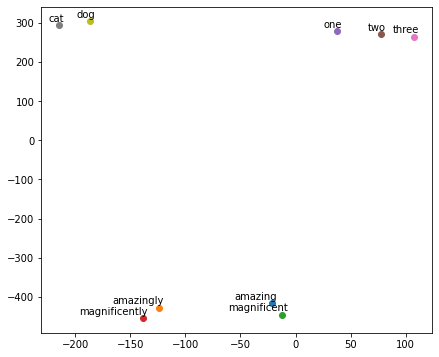

In [18]:
import matplotlib.pyplot as plt
# Let's visualize this, using TSNE, a methods that can reduce the dimensionality of the vectors
labels = list(vectors.keys())
tokens = list(vectors.values())

tsne_model = TSNE(perplexity=1.5, n_components=2, init='pca', n_iter=2500, random_state=23)
new_values = tsne_model.fit_transform(tokens)

x = new_values[:,0]
y = new_values[:,1]

plt.figure(figsize=(7, 6)) 
for i in range(len(x)):
    plt.scatter(x[i],y[i])
    plt.annotate(labels[i],
                 xy=(x[i], y[i]),
                 xytext=(5, 2),
                 textcoords='offset points',
                 ha='right',
                 va='bottom')


This is a great result for several reasons:
- families of similar words are close between them
- Some of them encode some syntax (magnificent and amazing) need similar vectors to approach their adverbs! 

## Learning Representations with Deep-NN Models

More recently the introduction of deep neural models for building text representations provided us with capabilities of better language understading and subsequently solve easier text related tasks. Specifically, we can distinguish the so-called Transformers in three different classes with respect to the objective they optimize for: 

- Language Model: estimate the probability of a word given previous words.
- Machine Translation: in a sequence mode predict the words in the target sentence.
- Masked Language Model: predict the masked token.

<img src="https://github.com/ioannispartalas/CrossLingual-NLP-AMLD2020/blob/master/data/images/lm_models.png?raw=1">

# An Introduction to Cross-Lingual Embeddings


* Thus far we dealt with word embedding created from English corpus (mono-lingual word embedding).
* We however often need to scale up to market other than English.
* Mono-lingual word embeddings are not quite useful here; it captures the particularities of the specific language but not others.
* Training/maintaining/quality-controlling multiple word embeddings for each langauge market may not be desirable.
* In this section we introduce the concept of **Cross-Ligual Word Embdeggins** which Jointly create ONE embedding for multiple languages.

## Cross-Lingual Word Embedding 

One embedding means that words from different languages are mapped into the common vectors space

* Let's see how this look like. 
* For this exercise, we will use the **ConceptNet** multilingual embeddings for English and French. 

In [19]:
import sys
sys.path.append('..')
from src.utils import load_embeddings,emb2numpy
from IPython.display import Image
import numpy as np
from umap import UMAP
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
# Create lists of example English and French words

english_words = ["room","hotel","towel","book","coffee","chair","glass","pen","shoe","two","amazing"]
french_words = ["hôtel","chambre","livre","café","chaise","serviette","verre","stylo","chaussure","deux","fantastique"]

In [21]:
# Load pre-trained embedding

# en_emb = load_embeddings(path="../concept_net_1706.300.en", dimension=300,skip_header=False,vocab=english_words)
# fr_emb = load_embeddings(path="../concept_net_1706.300.fr", dimension=300,skip_header=False,vocab=french_words)

en_emb = load_embeddings(path=workdir + "concept_net_1706.300.en", dimension=300,skip_header=False,vocab=english_words)
fr_emb = load_embeddings(path=workdir + "concept_net_1706.300.fr", dimension=300,skip_header=False,vocab=french_words)

Loaded 11 vectors
Loaded 11 vectors


In [0]:
# Put the vectors in arrays for processing

words_en,V_en = emb2numpy(en_emb)
words_fr,V_fr = emb2numpy(fr_emb)

In [0]:
vectors = np.concatenate((V_en,V_fr))
all_words  = words_en+words_fr

In [0]:
# We project the 300d vectors to a 2d space for visualization
V_umap = UMAP(n_neighbors=3,min_dist=0.6).fit_transform(vectors)


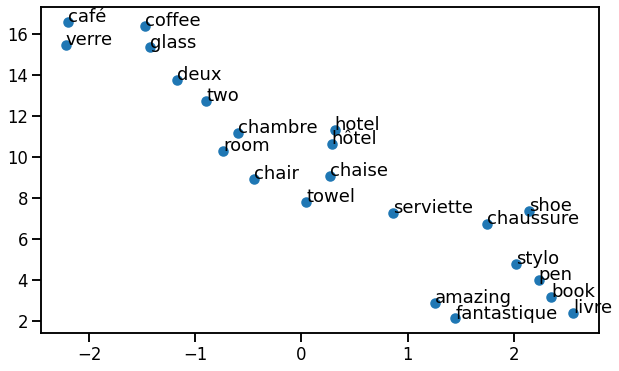

In [25]:
sns.set_context("talk")

fig= plt.figure(figsize=(10,6))

plt.scatter(V_umap[:, 0], V_umap[:, 1])
for i, word in enumerate(all_words):
    plt.annotate(word, xy=(V_umap[i, 0], V_umap[i, 1]))
plt.show()

* From this visualization, you can see the mapping preservs words' semantic meanings 
* Observe that **the words from the different languages but similar meanings are close** in the embeddings projection.

## How these word embeddings are created?

Word embeddings are often created once and used for downstream ML model training (as a tools for feature transformation). Many open souce embeddings are readily available and as ML practioner, you may rarely have occasion to create embeddings yourself. 

We will though take a bit closer look on how those embedding are created in this section

* Several methods for learning such cross-lingual embeddings have been proposed recently. 
* They most straightforward way is to learn mono-lingual embeddings separately, then post-hoc align using some supervision 
* The type of supervision can vary from parallel sentences (for example, parallel translation) to cheaper signals like for example bilingual dictionaries.

The following figure presents schematically the approach of mono-lingual mapping.


![](https://github.com/ioannispartalas/CrossLingual-NLP-AMLD2020/blob/master/data/images/alignment.png?raw=1)

What the "supervision" over the alignement? This is really wehre research efforts goes in. One way is to learn **linear projection that maps one embedding to the other** 

1. Train word embeddings separately.
2. Using bilingual dictionary, pair up word vectors from one language (say, English) to the other (say, French). This is the training data
3. Then, train a linear projection function by minimizing the distance between all pairs.
4. The method can be genealized for more than 2 languages.

![](https://github.com/ioannispartalas/CrossLingual-NLP-AMLD2020/blob/master/data/images/bilingual_alignement.png?raw=1)

Other recent methods do not require any seed dictionaries and induce in an iterative procedure one that is used to learn the projections. For a comprehensive study one can refer to [ Ruder et al., A Survey Of Cross-lingual Word Embedding Models](https://arxiv.org/abs/1706.04902)

## Cross-Lingual Sentence Embeddings

* Word embedding is cool and useful, but it's a bit unsettling
* It ignores word order, but we know that order of words matters. 
* It does not consider that words change their meanings depends on the contexts
* In short, they could miss salient information as they neglect **linguistic dependecies**. 
* How can we capture dependency? 


### LASER Sequence Encoder

* Some type of NN models, like LSTM (a type of RNN) or models with attention, can be used to encode **sequence of textual segments** such as sentences.
* Recently researchers have made significant progress in devising such NN encoderes which could dynamically create a vector representation for a given sentence.
* In a recent work, Facebook AI released a multi-lingual sentence encoder trained over sentences from 93 languages. [LASER](https://github.com/facebookresearch/LASER) (Language-Agnostic Sentence Representations) 
* What this means? Now we can create **dense vector representation of any sentence in any langauges** in common embedding space, **with one encoder**

### How this sentence encoder is trained?

A few things about current state of sentence encoder research: 
* it is hugely expensive to train. It most definitely requires huge parallel corpora (Laser used over 223 million parallel sentences). 
* Also computationally intensive (Laser took over 5 days to fully train). 
* Luckly, as are Word embeddings, several well-regarded open souce encoders are currently available. We can use them for downstream predictive task faily easily.


As a ML practioner you would not often train one from scratch. Here is how it work in a nutshell.

* Traiing goes essentially like a translation model. 

![](https://github.com/ioannispartalas/CrossLingual-NLP-AMLD2020/blob/master/data/images/laser.png?raw=1)

* The model is Bi-directional LSTM (BiLSTM) model which generate a sequence in a target language given a source sentence. (figure from [Artexte and Schwenk, Massively's 2019 TACL paper](https://arxiv.org/abs/1812.10464)). Note that since this is translation model, it comes in 2 parts: encoder and decoder.
* The model is trained on aligned corpora. 
* Once the model is fully trained, discard a decoder. Use Encoder (and max-pulling step) for future multi-lingual sentence encoding purpose. 

(Note that current state-of-art models use attention mechanism rather than BiLSTM.)

### How the sentence encodings look like? 

Let's use LASER and see how well can embed a few parallel sentences in English, French and Greek. For this, we will use the Doc2Laser class.

In [0]:
import sys
sys.path.append("..")
from src.models import *

In [4]:
print(Doc2Laser.__doc__)

Transform raw documents to their LASER representations.
    
    Parameters:
    -------------
    lang: string, the language to encode
    cpu: boolean, whether to use cpu of gpu
    


In [5]:
# English
en_sentences = ["This is a nice hotel.",
                "The bathroom was clean",
                "The dog is brown",
                "I will call you",
               "Not very far from the center"]

# define a transformer -- put cpu=False to turn on GPU option. Goes faster
doc2laser_transformer = Doc2Laser("en")

# Get the representation of the sentences
X_en = doc2laser_transformer.transform(en_sentences)

 - Encoder: loading /root/projects/LASER/models/bilstm.93langs.2018-12-26.pt
 - Tokenizer: temp_in_docs.txt in language en  
 - fast BPE: processing tok
 - Encoder: bpe to out.raw
 - Encoder: 5 sentences in 0s


In [6]:
# French
fr_sentences = ["Celui-ci était un hôtel magnifique",
                "La salle de bain était propre",
                "Le chien est brun",
                "Je t'appelle",
               "Pas très loin du centre"]

# Change the language in the transformer
doc2laser_transformer.set_params(lang="fr")
X_fr = doc2laser_transformer.transform(fr_sentences)

 - Encoder: loading /root/projects/LASER/models/bilstm.93langs.2018-12-26.pt
 - Tokenizer: temp_in_docs.txt in language fr  
 - fast BPE: processing tok
 - Encoder: bpe to out.raw
 - Encoder: 5 sentences in 0s


/pytorch/aten/src/ATen/native/RangeFactories.cpp:195: UserWarning: The number of elements in the out tensor of shape [7] is 7 which does not match the computed number of elements 9. Note that this may occur as a result of rounding error. The out tensor will be resized to a tensor of shape (9,).


In [33]:
# Greece

gr_sentences = ["Το ξενοδοχείο ήταν υπέροχο",
                "Η τουαλέτα ήταν καθαρή",
                "Ο σκύλος είναι καφέ",
                "Σε παίρνω τηλέφωνο",
                "Όχι πολύ μακριά από το κέντρο"]
# Change the language in the transformer
doc2laser_transformer.set_params(lang="el", cpu=False)
X_gr = doc2laser_transformer.transform(gr_sentences)

 - Encoder: loading /root/projects/LASER/models/bilstm.93langs.2018-12-26.pt
 - Tokenizer: temp_in_docs.txt in language el  
 - fast BPE: processing tok
 - Encoder: bpe to out.raw
 - Encoder: 5 sentences in 0s


/pytorch/aten/src/ATen/native/RangeFactories.cpp:195: UserWarning: The number of elements in the out tensor of shape [9] is 9 which does not match the computed number of elements 10. Note that this may occur as a result of rounding error. The out tensor will be resized to a tensor of shape (10,).


Let's project the sentence representations now in a 2d space and check if the parallel sentences in the three languages are close.

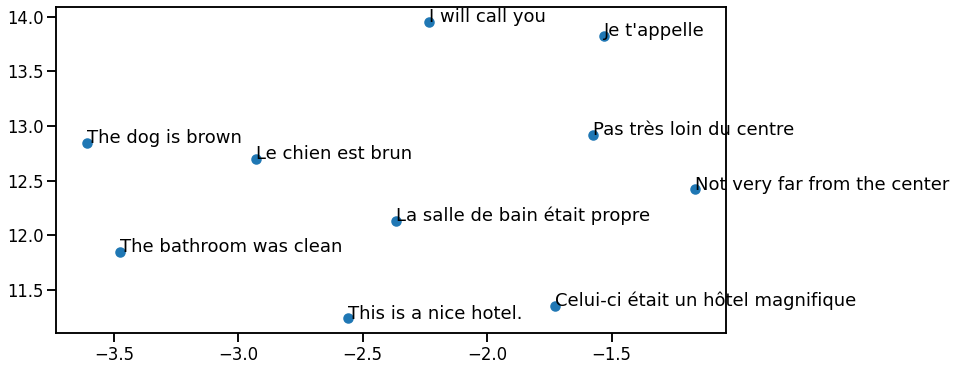

In [37]:
V_umap = UMAP(n_neighbors=5,min_dist=0.2).fit_transform(np.concatenate((X_en,X_fr)))

fig= plt.figure(figsize=(12,6))

plt.scatter(V_umap[:, 0], V_umap[:, 1])
for i, word in enumerate(en_sentences+fr_sentences):
    plt.annotate(word, xy=(V_umap[i, 0], V_umap[i, 1]))
plt.show()

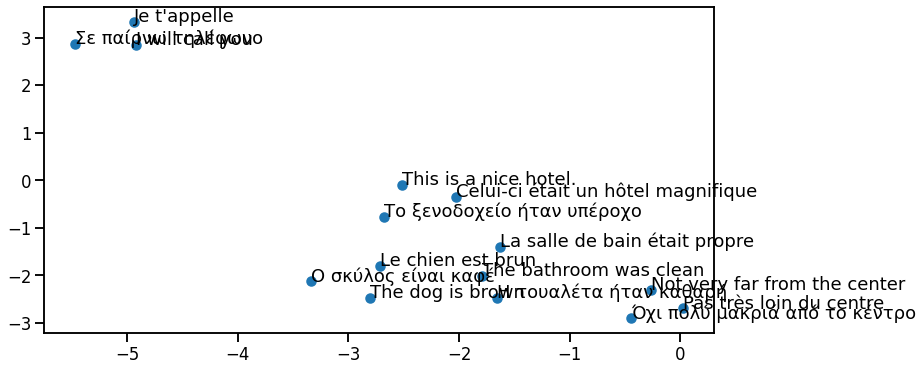

In [36]:
V_umap = UMAP(n_neighbors=5,min_dist=0.2).fit_transform(np.concatenate((X_en,X_fr,X_gr)))

fig= plt.figure(figsize=(12,6))

#plt.scatter(V_umap[:, 0], V_umap[:, 1])
plt.scatter(V_umap[:, 0], V_umap[:, 1])
for i, word in enumerate(en_sentences+fr_sentences+gr_sentences):
    plt.annotate(word, xy=(V_umap[i, 0], V_umap[i, 1]))
plt.show()

We can observe that the parallel sentences are close to the embedding space which means that the model can capture the semantic in a single latent multi-lingual space. 

***Exercise:*** Try to add few more parallel sentence in other languages and project them with the same way.

# Cross-lingual Document Classification

## Problem description

Cross-lingual document classification (CLDC) is the text mining problem where we are given:
- labeled documents for training in a source language $\ell_1$, and 
- test documents written in a target language $\ell_2$. 

For example, the training documents are written in English, and the test documents are written in French. 


CLDC is an interesting problem. The hope is that we can use resource-rich languages to train models that can be applied to resource-deprived languages. This would result in transferring knowledge from one language to another. 
There are several methods that can be used in this context. In this workshop we start from naive approaches and progressively introduce more complex solutions. 

The most naive solution is to ignore the fact the training and test documents are written in different languages.  

In [0]:
import pandas as pd
from sklearn.metrics import accuracy_score,f1_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.dummy import DummyClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.utils.validation import check_X_y
from sklearn.utils.multiclass import unique_labels
from sklearn.feature_extraction.text import CountVectorizer
import seaborn as sns
from prettytable import PrettyTable


import sys
sys.path.append("..")

from collections import Counter
from src.models import *
from src.utils import *
from src.dataset import *


<img src="https://github.com/ioannispartalas/CrossLingual-NLP-AMLD2020/blob/master/data/images/classes.png?raw=1" width=600>

1. Dataset: holds the data of sources and target language
2. System: This is a set of steps: Does fit, predict. Can be in the form of a pipeline also
3. Experiment: Given a Dataset and a System it fits, predicts and reports evaluation scores

For this workshop we will use a dataset from the [SemEval](http://alt.qcri.org/semeval2015/) workshop for the Sentiment Analysis task. While the tasks have three classes, that is **Positive, Negative, Neutral**, we will use only two classes in order to simplify it. So, let's load the data for a pair of languages and check a few statistics.

In [0]:
# dataset = Dataset("../data/raw/","en", "es")
dataset = Dataset(workdir + "data/raw/","en", "es")

dataset.load_data()
#To check the arguments of the function
#print(dataset.load_cl_embeddings.__doc__)
#dataset.load_cl_embeddings("../",300,False)
dataset.load_cl_embeddings(workdir,300,False)



Training data
Training Data Shape:  (1635, 2)
Class distribution:  {'positive': 1114, 'negative': 521}

Training data
Training Data Shape:  (644, 2)
Class distribution:  {'positive': 455, 'negative': 189}
Loaded 3315 vectors
Loaded 1287 vectors


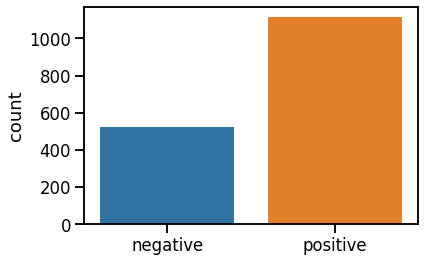

In [0]:
# Plot the counts on the classes for the source language
sns.countplot(dataset.y_train,order=["negative","positive"])

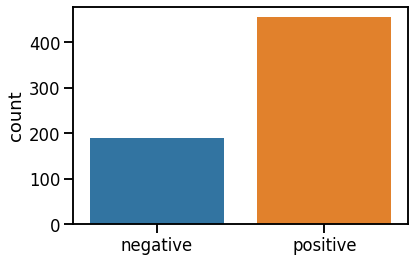

In [0]:
# And for the Spanish dataset
sns.countplot(dataset.y_test,order=["negative","positive"])

Observe that the datasets are unbalanced as we have much more positive comments that negative ones. We will start by establishing a few baselines and see how we can improve over them by leveraging cross-lingual word embeddings. We will start with a dummy classifier that will respect the distribution of the classes to generate some random predictions. 

In [0]:
# Let's keep the scores of all the expriments in a table
x = PrettyTable()

x.field_names = ["Model", "f-score"]

# Majority Class
pipeline = Pipeline([('vectorizer', CountVectorizer()), 
                     ('classifier', DummyClassifier("stratified"))])
runner = Runner(pipeline, dataset)
score = runner.eval_system()
x.add_row(["Dummy", format_score(score)])
print(x)

+-------+---------+
| Model | f-score |
+-------+---------+
| Dummy |  68.69  |
+-------+---------+


We start with a model that just uses term frequencies in order to represent the documents. We expect that in cases where the source and target languages share a part of the vocabulary, for example in latin languages, this approach can potentially give descent results. We will just use unigrams for this exercice but of course you can alter this baseline in order to leverage character n-grams.

In [0]:
# Logistic Regression on words
pipeline = Pipeline([('vectorizer', CountVectorizer(lowercase=True)), 
                     ('classifier', LogisticRegression(solver="lbfgs"))])
runner = Runner(pipeline, dataset)
score = runner.eval_system()
x.add_row(["LR unigrams",format_score(score)])
print(x)

+-------------+---------+
|    Model    | f-score |
+-------------+---------+
|    Dummy    |  68.69  |
| LR unigrams |  83.91  |
+-------------+---------+


Let's see now how we can leverage the cross-lingual word embeddings in order to perform zero-shot learning. A simple but effective baseline consists of averaging the word embeddings in each document in order to come up with a document (or sentence) representation. We will do that by using a look-up table in order to pull the appropriate cross-linual word embeddings for each document as it is shown in the diagram:

![](https://github.com/ioannispartalas/CrossLingual-NLP-AMLD2020/blob/master/data/images/vec_average.png?raw=1)

As we saw during the introduction we use a binary representation for the document terms which we use to perform a look-up in the embeddings matrix of size $V\times d$, where $V$ is the size of the vocabulary and $d$ the dimension of the latent space, and pull the vectors. In the example we will pull three vectors. Finally, we will just calculate our document vector by just averaging the vectors. We will repeat this operation for each document in both the target and the source languages. Then we will follow the zero-shot learning framework and we will train a classifier on the source language and predict on the target language.

In [0]:
for name, myclf in zip(['Knn-nBow', 'LR-nBow'],[KNeighborsClassifier(n_neighbors=2), LogisticRegression(C=10, solver="lbfgs")]):

    avg_baseline = nBowClassifier(myclf,dataset.source_embeddings,dataset.target_embeddings)

    pipeline = Pipeline([('vectorizer', CountVectorizer(lowercase=True,vocabulary=dataset.vocab_)), 
                         ('classifier', avg_baseline)])

    runner = Runner(pipeline, dataset)
    x.add_row([name, format_score(runner.eval_system())])
    

In [0]:
print(x)

+-------------+---------+
|    Model    | f-score |
+-------------+---------+
|    Dummy    |  68.69  |
| LR unigrams |  83.91  |
|   Knn-nBow  |  72.31  |
|   LR-nBow   |  87.38  |
+-------------+---------+


In the following model we will use the LASER representations in order to train the classifiers within the same framework.

In [0]:
for name, myclf in zip(['Knn-laser', 'LR-laser'],[KNeighborsClassifier(n_neighbors=2), LogisticRegression(C=10, solver="lbfgs")]):
    laser_clf = LASERClassifier(myclf, dataset.source_lang, dataset.target_lang)
    pipeline = Pipeline([("doc2laser",Doc2Laser()),('classifier', laser_clf)])
    pipeline.set_params(doc2laser__lang=dataset.source_lang)
    pipeline.fit(dataset.train,dataset.y_train)
    runner = Runner(pipeline, dataset)

    pipeline.set_params(doc2laser__lang=dataset.target_lang)
    x.add_row([name, format_score(runner.eval_system(prefit=True))])

 - Encoder: loading /root/projects/LASER/models/bilstm.93langs.2018-12-26.pt
 - Tokenizer: temp_in_docs.txt in language en  
 - fast BPE: processing tok
 - Encoder: bpe to out.raw


/pytorch/aten/src/ATen/native/RangeFactories.cpp:195: UserWarning: The number of elements in the out tensor of shape [10] is 10 which does not match the computed number of elements 108. Note that this may occur as a result of rounding error. The out tensor will be resized to a tensor of shape (108,).


 - Encoder: 1635 sentences in 35s
 - Encoder: loading /root/projects/LASER/models/bilstm.93langs.2018-12-26.pt
 - Tokenizer: temp_in_docs.txt in language es  
 - fast BPE: processing tok
 - Encoder: bpe to out.raw


/pytorch/aten/src/ATen/native/RangeFactories.cpp:195: UserWarning: The number of elements in the out tensor of shape [108] is 108 which does not match the computed number of elements 209. Note that this may occur as a result of rounding error. The out tensor will be resized to a tensor of shape (209,).


 - Encoder: 644 sentences in 17s
 - Encoder: loading /root/projects/LASER/models/bilstm.93langs.2018-12-26.pt
 - Tokenizer: temp_in_docs.txt in language en  
 - fast BPE: processing tok
 - Encoder: bpe to out.raw
 - Encoder: 1635 sentences in 33s
 - Encoder: loading /root/projects/LASER/models/bilstm.93langs.2018-12-26.pt
 - Tokenizer: temp_in_docs.txt in language es  
 - fast BPE: processing tok
 - Encoder: bpe to out.raw
 - Encoder: 644 sentences in 16s


In [0]:
print(x)

+-------------+---------+
|    Model    | f-score |
+-------------+---------+
|    Dummy    |  68.69  |
| LR unigrams |  83.91  |
|   Knn-nBow  |  72.31  |
|   LR-nBow   |  87.38  |
|  Knn-laser  |  85.05  |
|   LR-laser  |  91.47  |
+-------------+---------+


We observe that the zero-shot learning using LASER representations can achieve state-of-the-art results in this pair of languages. 

***Exercises:*** 

* Use other pairs of languages and see the performance. For example, you can try to transfer from more distant languages like Russian.
* Write a function in order to calculate all the pairs of (source,target) languages and compare the results.
* Tune the classifier or use other type of models.

## Few-shot Learning

On this notebook, we will work on a multilingual dataset containing sentences in six languages: english, dutch, spanish, russian, arabic and turkish. Every sentence of every language comes along a with sentiment label indicating *positive* or *negative* content. There is no sentence overlap between idioms. 

Working with the LASER multilinguale representation, we directly provide the sentence embedding for all languages. Every sentence is represented by a 1024 dimensional vector indicating its position in LASER.

In [0]:
import sys
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, confusion_matrix
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
sys.path.insert(1, workdir)

from src.utils import load_training_languages, model_evaluation, get_statistics

The 3 following utility functions will be used in this notebook:

- ```
model_evaluation(model, [languages])
```: evaluate the ```model``` over list of ```languages```. Returns [F1](https://en.wikipedia.org/wiki/F1_score) score, more suited for imbalanced dataset and [Confusion matrix](https://en.wikipedia.org/wiki/Confusion_matrix) to analyse model outputs in details.
- ```x_train, y_train = load_training_languages([languages])```: Returns concatenated features and labels for languages specified in ```languages```.
- ```get_statistics([languages]```: print out class population for languages specified in ```languages```.

In [0]:
all_languages = ['en','es','nl','ru','ar','tr']
get_statistics(all_languages)

en : 
Training: [('positive', 1114), ('negative', 521)] , total = 1635
Test: [('positive', 413), ('negative', 139)] , total = 552 

es : 
Training: [('positive', 1145), ('negative', 406)] , total = 1551
Test: [('positive', 455), ('negative', 189)] , total = 644 

nl : 
Training: [('positive', 712), ('negative', 498)] , total = 1210
Test: [('positive', 253), ('negative', 173)] , total = 426 

ru : 
Training: [('positive', 2014), ('negative', 528)] , total = 2542
Test: [('positive', 592), ('negative', 241)] , total = 833 

ar : 
Training: [('positive', 2733), ('negative', 1795)] , total = 4528
Test: [('positive', 656), ('negative', 498)] , total = 1154 

tr : 
Training: [('positive', 573), ('negative', 435)] , total = 1008
Test: [('positive', 84), ('negative', 36)] , total = 120 



## Dataset statistics

The multilingual dataset consists in 6 different languages: english (```en```), spanish (`es`), dutch (`nl`), russian (`ru`), arabic (`a`r) and turkish (`tr`).

all_languages = ['en','es','nl','ru','ar','tr']

get_statistics(all_languages)

#Few Shot Learning
While learning a language classification model generally requires abundance of training materials, it happens frequently that some languages are systematically under representated, leading to poor prediction performance. 

In that situation, using a common language representation such as LASER permits to increase the training data by adding to the initial (small) set, (possibly larger) dataset from other languages. 

As shown in figure below, poplulating the training space increases the chances to accurately determine the decision function.  

![Few Shot Learning](https://upload.wikimedia.org/wikipedia/commons/d/d0/Example_of_unlabeled_data_in_semisupervised_learning.png)

In the following, we are going to experiment the Few Shot Learning concepts by training and testing classifier on different combinations of languague.

Let's train a [Logistic Regression](https://fr.wikipedia.org/wiki/R%C3%A9gression_logistique) (a linear classifier) on russian, and look at the model accuracy



In [0]:
x_train,y_train = load_training_languages(['ru'])
lr = LogisticRegression(C = 10,max_iter = 200,random_state = 1).fit(x_train,y_train)
_ = model_evaluation(lr, ['ru'])

ru : F1=  0.7053140096618357 
                PRED NEGATIVE  PRED POSITIVE
TRUE NEGATIVE            146             95
TRUE POSITIVE             27            565 



The overall performance is not fantastic. Could we do better? Let's add more languages to the training data


In [0]:
x_train,y_train = load_training_languages(all_languages)
lr = LogisticRegression(C = 10,max_iter = 200,random_state = 1).fit(x_train,y_train)
_ = model_evaluation(lr, ['ru'])

ru : F1=  0.8092243186582809 
                PRED NEGATIVE  PRED POSITIVE
TRUE NEGATIVE            193             48
TRUE POSITIVE             43            549 



The F1 score has improved by 0.1! Quite impressive.

Same operation with turkish



In [0]:

x_train,y_train = load_training_languages(['tr'])
lr = LogisticRegression(C = 10,random_state = 1).fit(x_train,y_train)
_ = model_evaluation(lr, ['tr'])


tr : F1=  0.6582278481012659 
                PRED NEGATIVE  PRED POSITIVE
TRUE NEGATIVE             26             10
TRUE POSITIVE             17             67 



The F1 score is now quite low. Small dataset, data quality, language complexity may explain the poor performance.

Fair enough, let's use all available languages to improve our model


In [0]:

x_train,y_train = load_training_languages(all_languages)
lr = LogisticRegression(C = 10,max_iter = 200,random_state = 1).fit(x_train,y_train)
_ = model_evaluation(lr, ['tr'])


tr : F1=  0.6578947368421053 
                PRED NEGATIVE  PRED POSITIVE
TRUE NEGATIVE             25             11
TRUE POSITIVE             15             69 



No improvement... Maybe another combination of languages leads to different results. What happen if we remove spanish and russian from the training set


In [0]:

x_train,y_train = load_training_languages(['ar','tr','nl','en'])
lr = LogisticRegression(C = 10,max_iter = 200,random_state = 1).fit(x_train,y_train)
_ = model_evaluation(lr, ['tr'])


tr : F1=  0.7088607594936709 
                PRED NEGATIVE  PRED POSITIVE
TRUE NEGATIVE             28              8
TRUE POSITIVE             15             69 



Better! Apparently spanish and russian were perturbing the model for turkish language.

Could we imagine a more systematic source language selection to optimize performance on a specific target language? (Beware that the test set of the target language cannot be used to perform this selection)

## Non linear model

Until now we have used Logisitic Regression. However more complex models, such as [multi layer perceptron](https://en.wikipedia.org/wiki/Multilayer_perceptron) (MLP) 

In [0]:
 from sklearn.neural_network import MLPClassifier
 mlp = MLPClassifier(solver='lbfgs', 
                     hidden_layer_sizes=(16),
                     activation = 'relu',
                     alpha=1e-3,
                     max_iter = 50,
                     early_stopping =True,
                     validation_fraction = 0.2, 
                     random_state=1)\
      
 _ = model_evaluation(mlp.fit(x_train,y_train),['ru'])

ru : F1=  0.7337057728119181 
                PRED NEGATIVE  PRED POSITIVE
TRUE NEGATIVE            197             44
TRUE POSITIVE             99            493 



or [extreme gradient boosting](https://en.wikipedia.org/wiki/XGBoost) (xgboost) are obviously possible.

In [0]:
import xgboost as xgb
boost = xgb_model = xgb.XGBClassifier(objective="binary:logistic",max_depth =5, random_state=42)
_ = model_evaluation(boost.fit(x_train,y_train),['ru'])

ru : F1=  0.7999999999999999 
                PRED NEGATIVE  PRED POSITIVE
TRUE NEGATIVE            210             31
TRUE POSITIVE             74            518 



What can we conclude from the above results?

# References

[1. Ruder et al., A Survey Of Cross-lingual Word Embedding Models](https://arxiv.org/abs/1706.04902)

[2. Artexte and Schwenk, Massively Multilingual Sentence Embeddings for Zero-Shot Cross-Lingual Transfer and Beyond](https://arxiv.org/abs/1812.10464)

[3. Lena Voita et al., Evolution of Representations in the Transformer](https://arxiv.org/abs/1909.01380)

[4. Balikas and Partalas, Wasserstein distances for evaluating cross-lingual embeddings](https://arxiv.org/abs/1910.11005)
